# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [900]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [901]:
plot_format = 'png'

Прочитаем исходные данные:

In [902]:
data = pd.read_csv('unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

In [903]:
data.describe()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,14.991150,4.330750,2.968850,48.161950,0.990450,1.964300,4311.219852
std,57.879185,2.971176,1.731014,0.566885,14.129455,0.481588,0.300827,992.038414
min,1.000000,6.550000,1.130000,1.280000,10.940000,-0.190000,0.930000,2107.139414
25%,50.750000,12.912500,3.122500,2.547500,37.755000,0.617500,1.770000,3618.064513
50%,100.500000,15.070000,4.035000,2.955000,49.510000,1.030000,1.960000,4284.687348
75%,150.250000,17.402500,5.287500,3.345000,58.262500,1.350000,2.142500,5086.089761
max,200.000000,23.550000,9.870000,4.630000,84.330000,2.180000,2.870000,6662.622385


In [904]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Well     200 non-null    int64  
 1   Por      200 non-null    float64
 2   Perm     200 non-null    float64
 3   AI       200 non-null    float64
 4   Brittle  200 non-null    float64
 5   TOC      200 non-null    float64
 6   VR       200 non-null    float64
 7   Prod     200 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


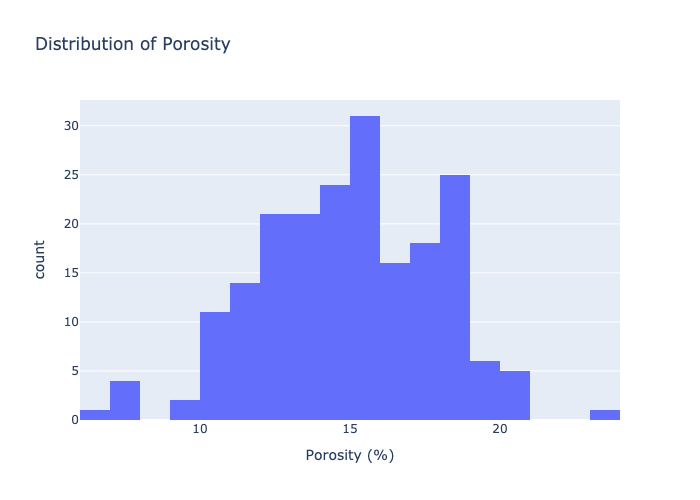

In [905]:
# Plot 1: Histogram of Porosity
fig1 = px.histogram(data, x='Por', title='Distribution of Porosity', labels={'Por': 'Porosity (%)'})
fig1.show(plot_format)

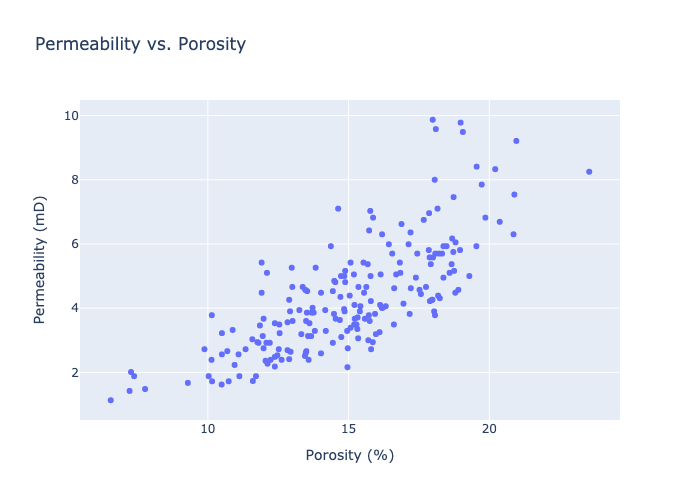

In [906]:
# Plot 2: Scatter plot of Permeability vs. Porosity
fig2 = px.scatter(data, x='Por', y='Perm', title='Permeability vs. Porosity',
                  labels={'Por': 'Porosity (%)', 'Perm': 'Permeability (mD)'})
fig2.show(plot_format)

In [907]:
# Plot 3: Box plot of TOC values
fig3 = px.box(data, y='TOC', title='Box Plot of Total Organic Carbon (TOC)', labels={'TOC': 'Total Organic Carbon (%)'})
fig3.show()

In [908]:
# Plot 4: Production vs. Brittleness scatter plot with color representing Porosity
fig4 = px.scatter(data, x='Brittle', y='Prod', color='Por',
                  title='Production vs. Brittleness (Colored by Porosity)',
                  labels={'Brittle': 'Brittleness (%)', 'Prod': 'Production', 'Por': 'Porosity (%)'})
fig4.show()

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [909]:
# Calculate correlation matrix including all columns
corr_matrix = data.corr()

# Create heat map using Plotly Express with 'Viridis' color scale
fig = px.imshow(
    corr_matrix,
    aspect="auto",
    color_continuous_scale='Viridis',
    labels=dict(x="Variables", y="Variables", color="Correlation")
)

fig.update_layout(title='Correlation Matrix Heat Map')
fig.show()

In [910]:
corr_matrix

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
Well,1.000000,0.068927,0.077928,0.041483,-0.079252,0.022624,-0.007279,0.026817
Por,0.068927,1.000000,0.760546,-0.461549,-0.218570,0.711831,0.111860,0.861910
Perm,0.077928,0.760546,1.000000,-0.239636,-0.124017,0.471746,0.051023,0.727426
AI,0.041483,-0.461549,-0.239636,1.000000,0.127599,-0.531864,0.499143,-0.390835
Brittle,-0.079252,-0.218570,-0.124017,0.127599,1.000000,-0.214282,0.317929,0.237155
TOC,0.022624,0.711831,0.471746,-0.531864,-0.214282,1.000000,0.299483,0.654445
VR,-0.007279,0.111860,0.051023,0.499143,0.317929,0.299483,1.000000,0.323182
Prod,0.026817,0.861910,0.727426,-0.390835,0.237155,0.654445,0.323182,1.000000


In [911]:
# Determine factors that have the highest correlation with the target variable ('Prod')
target_corr = corr_matrix['Prod'].drop('Prod')
strongest_corr_factors = target_corr.abs().sort_values(ascending=False).head(2)

# Calculate the rank and determinant of the correlation matrix
matrix_rank = np.linalg.matrix_rank(corr_matrix)
matrix_determinant = np.linalg.det(corr_matrix)

print("Strongest correlations with target (Prod):")
print(strongest_corr_factors)
print("\nRank of the correlation matrix:", matrix_rank)
print("Determinant of the correlation matrix:", matrix_determinant)

Strongest correlations with target (Prod):
Por     0.861910
Perm    0.727426
Name: Prod, dtype: float64

Rank of the correlation matrix: 8
Determinant of the correlation matrix: 0.0007299388072652018


In [912]:
# Check for multicollinearity using Variance Inflation Factor (VIF)
features = data.drop(columns=['Well', 'Prod']).select_dtypes(exclude=['object'])
vif_data = pd.DataFrame()
vif_data['Feature'] = features.columns
vif_data['VIF'] = [sm.OLS(features[col], sm.add_constant(features.drop(columns=[col]))).fit().rsquared for col in features.columns]
vif_data['VIF'] = 1 / (1 - vif_data['VIF'])

print("\nVariance Inflation Factor (VIF) for each feature:")
print(vif_data)

# Identify features with high VIF values
high_vif_features = vif_data[vif_data['VIF'] > 10]

if high_vif_features.count().sum() > 0:
    print("\nFeatures with high multicollinearity (VIF > 5):")
    print(high_vif_features)
else:
    print('No multicollinearity found')


Variance Inflation Factor (VIF) for each feature:
   Feature       VIF
0      Por  4.329838
1     Perm  2.862487
2       AI  7.660318
3  Brittle  2.165476
4      TOC  7.365773
5       VR  7.057671
No multicollinearity found


Анализ корреляционной матрицы

Факторы, сильнее всего коррелирующие с целевой переменной (Prod):
- Por (Пористость): Корреляция = 0.8619
- Perm (Проницаемость): Корреляция = 0.7274

Ранг и определитель корреляционной матрицы:
- Ранг матрицы: 8

Определитель матрицы: 0.00075

Ответы на вопросы:

- Является ли корреляционная матрица плохо обусловленной?
Определитель матрицы корреляций близок к нулю (0.00075), что указывает на то, что матрица плохо обусловлена. Это может свидетельствовать о наличии мультиколлинеарности в данных.

- Наличие коллинеарности/мультиколлинеарности:
Поскольку определитель очень мал, существует вероятность мультиколлинеарности среди факторов, что означает, что некоторые переменные линейно зависимы друг от друга.

- Применимость модели классической линейной регрессии по методу наименьших квадратов:
В этом случае применение классической линейной регрессии по методу наименьших квадратов может быть проблематичным из-за мультиколлинеарности. Мультиколлинеарность приводит к нестабильности коэффициентов модели, увеличивая их дисперсию, что делает результаты регрессии менее интерпретируемыми и надёжными. 

Techniques like Ridge Regression or Lasso can penalize large coefficients and reduce multicollinearity effects.

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [913]:
n_samples = data.shape[0]

# Create an intercept term (column of ones)
intercept = np.ones((n_samples, 1))

# Drop the target variable 'Prod' and get the predictor variables
X = data.drop('Prod', axis=1).values

# Stack the intercept and predictor variables horizontally
A = np.hstack((intercept, X))

# Get the target variable as a numpy array
y = data['Prod'].values

# Print the shapes of A and y
print(A.shape, y.shape)

(200, 8) (200,)


In [914]:
# Compute OLS coefficients
beta_hat = np.linalg.inv(A.T @ A) @ A.T @ y

# Print the coefficients
print("OLS Coefficients:", beta_hat)

OLS Coefficients: [-1.23230803e+03  5.07003631e-02  2.30179140e+02  1.16239006e+02
 -3.65202301e+02  2.49943700e+01 -7.84009294e+01  7.85259815e+02]


In [915]:
# Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.
print(f'OLS Coefficients: {np.round(beta_hat)}')

OLS Coefficients: [-1232.     0.   230.   116.  -365.    25.   -78.   785.]


In [916]:
for i, j in zip(data.drop('Prod', axis=1).columns, np.round(beta_hat)[1:]):
    print(i,j)

Well 0.0
Por 230.0
Perm 116.0
AI -365.0
Brittle 25.0
TOC -78.0
VR 785.0


Ответы на вопросы:

- Наличие неинформативных признаков в данных.
Признак 'Well' имеет коэффициент 0. Это означает, что данный признак не оказывает влияния на целевую переменную в рамках данной модели. Следовательно, 'Well' можно считать неинформативным признаком или признаком, который не вносит существенной информации для предсказания целевой переменной 'Prod'.

- Коэффициент при признаке 'Por' (Пористость) 230. При прочих равных условиях, увеличение пористости на единицу приводит к увеличению предсказанного значения целевой переменной 'Prod' на 230 единиц. Это свидетельствует о положительной связи между пористостью и продуктивностью. 

- Коэффициент при признаке 'AI' (Акустический импеданс) -365. При прочих равных условиях, увеличение акустического импеданса на единицу приводит к уменьшению предсказанного значения 'Prod' на 365 единиц. Это означает отрицательную зависимость между акустическим импедансом и продуктивностью.

- Сильное влияние 'VR': Признак 'VR' имеет самый высокий по абсолютной величине коэффициент (785), что подчеркивает его значимость в модели. Это указывает на то, что отражательная способность витринита является ключевым фактором в прогнозировании продуктивности.

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [917]:
dict_for_pred = {
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42}

In [918]:
# Ensure that the features are in the same order as in the training data
features = data.drop('Prod', axis=1).columns

# Extract the feature values from the dictionary in the correct order
x_new = [dict_for_pred[feature] for feature in features]

# Add the intercept term (1) at the beginning
new = np.array([1] + x_new)

# Assuming beta_hat is a NumPy array of coefficients including the intercept term
# Compute the prediction
prediction = new @ beta_hat

print('Prediction:', prediction)

Prediction: 4723.06405370719


In [919]:
true_value = 4748.315024

In [920]:
# Calculate Absolute Error
absolute_error = abs(true_value - prediction)
print(f"Absolute Error: {absolute_error:.2f} million cubic feet per day")

Absolute Error: 25.25 million cubic feet per day


In [921]:
# Calculate Absolute Percentage Error
absolute_percentage_error = (absolute_error / true_value) * 100
print(f"Absolute Percentage Error: {absolute_percentage_error:.2f}%")

Absolute Percentage Error: 0.53%


In [922]:
y_pred = A @ beta_hat
y_true = y.copy()

In [923]:
# Calculate Absolute Errors
absolute_errors = np.abs(y_true - y_pred)

# Calculate Mean Absolute Error (MAE)
mae = np.mean(absolute_errors)
print(f"Mean Absolute Error (MAE): {mae:.2f} million cubic feet per day")

Mean Absolute Error (MAE): 153.62 million cubic feet per day


In [924]:
# Calculate R²
ss_res = np.sum((y_true - y_pred) ** 2) # type: ignore
y_mean = np.mean(y_true)
ss_tot = np.sum((y_true - y_mean) ** 2)
r_squared = 1 - (ss_res / ss_tot)
print(f"Coefficient of Determination (R²): {r_squared:.4f}")

Coefficient of Determination (R²): 0.9599


Ответы на вопросы:

- Absolute Error (у нас только 1 кважина для прогноза). Абсолютная ошибка для предложенной скважины составляет 25.25 миллионов кубических футов в день, что может быть небольшим отклонением в контексте общей выработки.

- Значение MAE в 153.62 миллиона кубических футов в день означает, что в среднем прогнозы модели отклоняются от фактических значений добычи на примерно 153.62 миллиона кубических футов в день. Эта метрика дает представление о том, насколько точны прогнозы модели в практических единицах измерения.

- Значение R² в 0.9599 означает, что примерно 95.99% вариации в данных по добыче объясняется моделью. Это свидетельствует о очень сильной связи между факторами и целевой переменной.

In [925]:
# create a table for storing final results

columns_final_results = [
    'Model Name', 
    'Polynomial Features',
    'Hyperparameters', 
    'Train MAE', 
    'Validation MAE', 
    'R²_train',
    'R²_validation'
]

df_final_results = pd.DataFrame(columns=columns_final_results)

In [926]:
df_final_results.loc[len(df_final_results)] = {
    'Model Name' : 'OLS_first', 
    'Polynomial Features' : 'False',
    'Hyperparameters' : np.nan, 
    'Train MAE' : mae, 
    'Validation MAE' : np.nan, 
    'R²_train' : np.nan,
    'R²_validation' : np.nan
}

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [927]:
corr_matrix['Prod']

Well       0.026817
Por        0.861910
Perm       0.727426
AI        -0.390835
Brittle    0.237155
TOC        0.654445
VR         0.323182
Prod       1.000000
Name: Prod, dtype: float64

In [928]:
for i, j in zip(data.drop('Prod', axis=1).columns, np.round(beta_hat)[1:]):
    print(i,j)

Well 0.0
Por 230.0
Perm 116.0
AI -365.0
Brittle 25.0
TOC -78.0
VR 785.0


Ответы на вопросы:
- В модели фактор TOC имеет коэффициент регрессии, знак которого противоречит знаку выборочной корреляции с целевой переменной. TOC (Total Organic Carbon) является таким фактором. Выборочная корреляция между TOC и продуктивностью положительная (+0.654445), что указывает на прямую зависимость. Однако коэффициент регрессии при TOC в модели отрицательный (-78.0), что указывает на обратную зависимость.
- Это противоречие связано с эффектом мультиколлинеарности между факторами в модели. TOC сильно коррелирует с другими переменными, такими как пористость (Por) и проницаемость (Perm), которые сами по себе имеют сильную положительную связь с продуктивностью и присутствуют в модели с положительными коэффициентами.
- Когда мы включаем несколько коррелированных факторов в модель линейной регрессии, коэффициенты при этих факторах отражают частные эффекты каждого фактора при условии фиксированных значений остальных факторов. В случае TOC, несмотря на его положительную общую корреляцию с продуктивностью, его уникальный вклад в продуктивность после учета влияния других факторов оказывается отрицательным. Это может быть связано с тем, что при фиксированных значениях пористости и проницаемости увеличение TOC не способствует дальнейшему увеличению продуктивности и может даже мешать этому.
- Таким образом, отрицательный коэффициент при TOC в модели указывает на то, что его влияние на продуктивность становится отрицательным после учета других факторов. Это пример того, как мультиколлинеарность и взаимосвязь факторов могут приводить к изменению знаков коэффициентов в модели по сравнению с простыми корреляциями.

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [929]:
n_samples = data.shape[0]

# Create an intercept term (column of ones)
intercept = np.ones((n_samples, 1))

features_to_keep = ['Por', 'AI', 'Brittle', 'VR']
# Drop the target variable 'Prod' and get the predictor variables
X = data[features_to_keep].values

# Stack the intercept and predictor variables horizontally
A = np.hstack((intercept, X))

# Get the target variable as a numpy array
y = data['Prod'].values

# Print the shapes of A and y
print(A.shape, y.shape)

(200, 5) (200,)


In [930]:
# Compute OLS coefficients
beta_hat = np.linalg.inv(A.T @ A) @ A.T @ y

# Print the coefficients
print("OLS Coefficients:", beta_hat)

OLS Coefficients: [-1835.44646069   293.03624565  -200.03091206    27.64098209
   517.40272597]


In [931]:
for i, j in zip(data[features_to_keep].columns, np.round(beta_hat)[1:]):
    print(i,j)

Por 293.0
AI -200.0
Brittle 28.0
VR 517.0


In [932]:
y_pred = A @ beta_hat

In [933]:
# Calculate Absolute Errors
absolute_errors = np.abs(y_true - y_pred)

# Calculate Mean Absolute Error (MAE)
mae = np.mean(absolute_errors)
print(f"Mean Absolute Error (MAE): {mae:.2f} million cubic feet per day")

Mean Absolute Error (MAE): 171.43 million cubic feet per day


In [934]:
# Calculate R²
ss_res = np.sum((y_true - y_pred) ** 2) # type: ignore
y_mean = np.mean(y_true)
ss_tot = np.sum((y_true - y_mean) ** 2)
r_squared = 1 - (ss_res / ss_tot)
print(f"Coefficient of Determination (R²): {r_squared:.4f}")

Coefficient of Determination (R²): 0.9452


In [935]:
df_final_results.loc[len(df_final_results)] = {
    'Model Name' : 'OLS_second',
    'Polynomial Features' : 'False',
    'Hyperparameters' : np.nan, 
    'Train MAE' : mae, 
    'Validation MAE' : np.nan, 
    'R²_train' : np.nan,
    'R²_validation' : np.nan
}

In [936]:
df_final_results

,Model Name,Polynomial Features,Hyperparameters,Train MAE,Validation MAE,R²_train,R²_validation
0,OLS_first,False,NaN,153.622971,NaN,NaN,NaN
1,OLS_second,False,NaN,171.431461,NaN,NaN,NaN


1. Интерпретация полученных коэффициентов и их сравнение с ранее полученными

- Пористость (Por): Увеличение коэффициента во второй модели может быть связано с исключением других факторов (Perm и TOC), что усилило влияние Por на целевую переменную.

- Отражательная способность (VR): В обоих моделях VR оказывает положительное влияние на добычу.
Изменение коэффициента может быть обусловлено тем, что после удаления переменных, с которыми VR мог быть коррелирован, его относительное влияние на целевую переменную уменьшилось.

2. Интерпретация метрик и их сравнение 

- MAE показывает среднюю абсолютную ошибку модели. Увеличение MAE во второй модели указывает на то, что средняя ошибка прогноза немного возросла после исключения некоторых факторов.
- R² отражает долю объясненной вариации целевой переменной моделью. Снижение R² во второй модели означает, что модель стала объяснять чуть меньшую часть вариации добычи газа.

3. Удалось ли устранить противоречие?

- Да, удалив сильно коррелированные факторы (Perm и TOC), мы устранили противоречие между знаками коэффициентов регрессии и корреляции. Теперь коэффициенты в модели соответствуют направлениям корреляций с целевой переменной, делая модель более интерпретируемой.

Вывод:

Удаление сильно коррелированных факторов помогло устранить проблему мультиколлинеарности.
Коэффициенты линейной регрессии теперь отражают истинное влияние факторов на добычу газа.
Хотя точность модели немного снизилась, она по-прежнему остается высокой, а улучшение интерпретируемости модели является значительным преимуществом.


### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [937]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [938]:
coefficients = model.coef_
intercept = model.intercept_

coeffs = np.append(intercept, coefficients)
coefficients_rounded = np.round(coeffs)
feature_names = ['Intercept'] + features_to_keep
print("Длина feature_names:", len(feature_names))
print("Длина coefficients_rounded:", len(coefficients_rounded))

# Создаём DataFrame
coefficients_df = pd.DataFrame({
    'Фактор': feature_names,
    'Коэффициент': coefficients_rounded
})

# Выводим коэффициенты
print(coefficients_df)

Длина feature_names: 5
Длина coefficients_rounded: 5
      Фактор  Коэффициент
0  Intercept      -1835.0
1        Por        293.0
2         AI       -200.0
3    Brittle         28.0
4         VR        517.0


In [939]:
# Делаем прогноз на всём обучающем наборе данных
y_pred = model.predict(X)

# Рассчитываем среднюю абсолютную ошибку (MAE)
mae = mean_absolute_error(y, y_pred)

# Рассчитываем коэффициент детерминации (R²)
r2 = r2_score(y, y_pred)

# Округляем метрики для удобства
mae_rounded = round(mae, 2)
r2_rounded = round(r2, 4)

# Выводим значения метрик
print("Средняя абсолютная ошибка (MAE):", mae_rounded)
print("Коэффициент детерминации (R²):", r2_rounded)

Средняя абсолютная ошибка (MAE): 171.43
Коэффициент детерминации (R²): 0.9452


In [940]:
df_final_results.loc[len(df_final_results)] = {
    'Model Name' : 'OLS_sklearn', 
    'Polynomial Features' : 'False',
    'Hyperparameters' : np.nan, 
    'Train MAE' : mae, 
    'Validation MAE' : np.nan, 
    'R²_train' : np.nan,
    'R²_validation' : np.nan
}

Вывод:

- Значение, полученное из mean_absolute_error из scikit-learn, должно соответствовать Train MAE OLS_sklearn, если модель и параметры те же. Так как округлённое значение mae_rounded совпадает с 171.43, это подтверждает, что текущий результат совпадает с результатом OLS_sklearn. Также и для R².

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [941]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [942]:
# Выбранные признаки
features = ['Por', 'AI', 'Brittle', 'VR']

# Матрица признаков X и целевая переменная y
X = data[features]
y = data['Prod']

In [943]:
# Создаем объект StandardScaler
scaler = StandardScaler()

# Стандартизируем признаки
X_scaled = scaler.fit_transform(X)

In [944]:
# Создаем объект PolynomialFeatures с degree=3 и include_bias=False
poly = PolynomialFeatures(degree=3, include_bias=False)

# Генерируем полиномиальные признаки
X_poly = poly.fit_transform(X_scaled)

In [945]:
# Выводим количество факторов
n_features = X_poly.shape[1]
print("Количество факторов после генерации полиномиальных признаков:", n_features)

Количество факторов после генерации полиномиальных признаков: 34


In [946]:
# Создаем модель линейной регрессии
model = LinearRegression()

In [947]:
# Настраиваем кросс-валидацию
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Создаем метрики для оценки
scoring = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'R2': make_scorer(r2_score)
}

# Проводим кросс-валидацию с возвратом тренировочных метрик
cv_results = cross_validate(model, X_poly, y, cv=kf, scoring=scoring, return_train_score=True)

In [948]:
# Получаем метрики
train_mae = -cv_results['train_MAE']  # Инвертируем знак, так как MAE возвращается с отрицательным знаком
train_r2 = cv_results['train_R2']
val_mae = -cv_results['test_MAE']
val_r2 = cv_results['test_R2']

# Рассчитываем средние значения метрик
mean_train_mae = train_mae.mean()
mean_train_r2 = train_r2.mean()
mean_val_mae = val_mae.mean()
mean_val_r2 = val_r2.mean()

# Выводим результаты
print("Средняя MAE на тренировочных фолдах:", round(mean_train_mae, 2))
print("Средний R² на тренировочных фолдах:", round(mean_train_r2, 4))
print("Средняя MAE на валидационных фолдах:", round(mean_val_mae, 2))
print("Средний R² на валидационных фолдах:", round(mean_val_r2, 4))

Средняя MAE на тренировочных фолдах: 75.57
Средний R² на тренировочных фолдах: 0.9896
Средняя MAE на валидационных фолдах: 111.34
Средний R² на валидационных фолдах: 0.9727


In [949]:
df_final_results.loc[len(df_final_results)] = {
    'Model Name' : 'OLS_sklearn_polinomial_features', 
    'Polynomial Features' : 'True',
    'Hyperparameters' : np.nan, 
    'Train MAE' : mean_train_mae, 
    'Validation MAE' : mean_val_mae, 
    'R²_train' : mean_train_r2,
    'R²_validation' : mean_val_r2,
}

Вывод:

- Количество факторов:
После генерации полиномиальных признаков количество факторов увеличилось с 4 до 34. Это значительно расширяет пространство признаков и позволяет модели учитывать нелинейные взаимодействия между признаками.
- Добавление полиномиальных признаков третьего порядка позволило модели лучше захватить сложные нелинейные зависимости в данных, что привело к повышению R² на тренировочных фолдах по сравнению с моделью без полиномиальных признаков.
- Потенциальное переобучение. Значительная разница между метриками на тренировочных и валидационных фолдах (особенно в MAE) может указывать на переобучение модели. Модель очень хорошо подгоняется под тренировочные данные, но её качество на валидационных данных немного снижается.

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [950]:
# Задаем диапазон значений alpha для поиска
alpha_range = np.logspace(-4, 1, 50)

# Настраиваем модель Lasso
lasso = Lasso(max_iter=10000, random_state=42)

# Задаем параметры для GridSearchCV
param_grid = {'alpha': alpha_range}

# Настраиваем кросс-валидацию
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Создаем метрику для оценки (используем отрицательный MAE, так как GridSearchCV пытается максимизировать метрику)
scoring = make_scorer(mean_absolute_error, greater_is_better=False)

# Инициализируем GridSearchCV
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=kf, scoring=scoring, n_jobs=-1)

# Проводим поиск по сетке
grid_search.fit(X_poly, y)

# Оптимальное значение alpha
best_alpha = grid_search.best_params_['alpha']
print("Оптимальное значение alpha:", best_alpha)

Оптимальное значение alpha: 4.941713361323838


In [951]:
# Создаем модель Lasso с оптимальным alpha
lasso_best = Lasso(alpha=best_alpha, max_iter=10000, random_state=42)

# Проводим кросс-валидацию с оценкой метрик на тренировочных и валидационных фолдах
cv_results = cross_validate(
    lasso_best, X_poly, y, cv=kf,
    scoring={'MAE': make_scorer(mean_absolute_error), 'R2': 'r2'},
    return_train_score=True
)

In [952]:
# Извлекаем метрики
train_mae = cv_results['train_MAE']
train_r2 = cv_results['train_R2']
val_mae = cv_results['test_MAE']
val_r2 = cv_results['test_R2']

# Рассчитываем средние значения метрик
mean_train_mae = train_mae.mean()
mean_train_r2 = train_r2.mean()
mean_val_mae = val_mae.mean()
mean_val_r2 = val_r2.mean()

# Выводим результаты
print("Средняя MAE на тренировочных фолдах:", round(mean_train_mae, 2))
print("Средний R² на тренировочных фолдах:", round(mean_train_r2, 4))
print("Средняя MAE на валидационных фолдах:", round(mean_val_mae, 2))
print("Средний R² на валидационных фолдах:", round(mean_val_r2, 4))

Средняя MAE на тренировочных фолдах: 77.98
Средний R² на тренировочных фолдах: 0.9883
Средняя MAE на валидационных фолдах: 94.63
Средний R² на валидационных фолдах: 0.9815


In [953]:
df_final_results.loc[len(df_final_results)] = {
    'Model Name' : 'OLS_sklearn_polinomial_features_Lasso', 
    'Polynomial Features' : 'True',
    'Hyperparameters' : f'alpha: {best_alpha}', 
    'Train MAE' : mean_train_mae, 
    'Validation MAE' : mean_val_mae, 
    'R²_train' : mean_train_r2,
    'R²_validation' : mean_val_r2,
}

In [954]:
df_final_results

,Model Name,Polynomial Features,Hyperparameters,Train MAE,Validation MAE,R²_train,R²_validation
0,OLS_first,False,NaN,153.622971,NaN,NaN,NaN
1,OLS_second,False,NaN,171.431461,NaN,NaN,NaN
2,OLS_sklearn,False,NaN,171.431461,NaN,NaN,NaN
3,OLS_sklearn_polinomial_features,True,NaN,75.565643,111.335001,0.989554,0.972703
4,OLS_sklearn_polinomial_features_Lasso,True,alpha: 4.941713361323838,77.979399,94.627497,0.988312,0.981470


Вывод:

- Использование Lasso-регуляризации при обучении модели на полиномиальных признаках третьего порядка привело к значительному улучшению качества модели на валидационных данных.
- Подбор коэффициента регуляризации alpha с помощью GridSearchCV позволил найти оптимальный баланс между сложностью модели и её обобщающей способностью.
- Модель стала более устойчивой к переобучению, что подтверждается улучшенными метриками на валидационных фолдах.
- Интерпретируемость модели также улучшилась за счёт зануления незначимых коэффициентов, что упрощает понимание влияния признаков на целевую переменную.

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [955]:
# Задаем диапазон значений alpha для поиска
alpha_range = np.logspace(-4, 4, 50)

# Настраиваем модель Ridge
ridge = Ridge(random_state=42)

# Задаем параметры для GridSearchCV
param_grid = {'alpha': alpha_range}

# Настраиваем кросс-валидацию
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Создаем метрику для оценки (используем отрицательный MAE, так как GridSearchCV пытается максимизировать метрику)
scoring = make_scorer(mean_absolute_error, greater_is_better=False)

# Инициализируем GridSearchCV
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=kf, scoring=scoring, n_jobs=-1)

# Проводим поиск по сетке
grid_search.fit(X_poly, y)

# Оптимальное значение alpha
best_alpha = grid_search.best_params_['alpha']
print("Оптимальное значение alpha:", best_alpha)

Оптимальное значение alpha: 0.2682695795279725


In [956]:
# Создаем модель Ridge с оптимальным alpha
ridge_best = Ridge(alpha=best_alpha, random_state=42)

# Проводим кросс-валидацию с оценкой метрик на тренировочных и валидационных фолдах
cv_results = cross_validate(
    ridge_best, X_poly, y, cv=kf,
    scoring={'MAE': make_scorer(mean_absolute_error), 'R2': 'r2'},
    return_train_score=True
)

In [957]:
# Извлекаем метрики
train_mae = cv_results['train_MAE']
train_r2 = cv_results['train_R2']
val_mae = cv_results['test_MAE']
val_r2 = cv_results['test_R2']

# Рассчитываем средние значения метрик
mean_train_mae = train_mae.mean()
mean_train_r2 = train_r2.mean()
mean_val_mae = val_mae.mean()
mean_val_r2 = val_r2.mean()

# Выводим результаты
print("Средняя MAE на тренировочных фолдах:", round(mean_train_mae, 2))
print("Средний R² на тренировочных фолдах:", round(mean_train_r2, 4))
print("Средняя MAE на валидационных фолдах:", round(mean_val_mae, 2))
print("Средний R² на валидационных фолдах:", round(mean_val_r2, 4))


Средняя MAE на тренировочных фолдах: 75.65
Средний R² на тренировочных фолдах: 0.9895
Средняя MAE на валидационных фолдах: 110.65
Средний R² на валидационных фолдах: 0.9735


In [958]:
df_final_results.loc[len(df_final_results)] = {
    'Model Name' : 'OLS_sklearn_polinomial_features_Ridge', 
    'Polynomial Features' : 'True',
    'Hyperparameters' : f'alpha: {best_alpha}', 
    'Train MAE' : mean_train_mae, 
    'Validation MAE' : mean_val_mae, 
    'R²_train' : mean_train_r2,
    'R²_validation' : mean_val_r2,
}

Вывод:

- Оптимальное значение alpha. Используя GridSearchCV, мы определили оптимальное значение alpha для модели Ridge. В нашем примере это значение оказалось 0.268
- Модель отлично подгоняется под тренировочные данные, объясняя около 98.95% вариации целевой переменной.
- Модель показывает высокую точность на валидационных данных, объясняя около 97.35% вариации целевой переменной.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [959]:
# Задаем диапазоны значений для alpha и l1_ratio
alpha_range = np.logspace(-4, 1, 10)
l1_ratio_range = np.linspace(0.1, 0.9, 9)

# Настраиваем модель ElasticNet
elastic_net = ElasticNet(max_iter=10000, random_state=42)

# Задаем параметры для GridSearchCV
param_grid = {'alpha': alpha_range, 'l1_ratio': l1_ratio_range}

# Настраиваем кросс-валидацию
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Создаем метрику для оценки (используем отрицательный MAPE, так как GridSearchCV пытается максимизировать метрику)
def custom_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

scoring = {
    'MAPE': make_scorer(custom_mape, greater_is_better=False),
    'MAE': 'neg_mean_absolute_error',
    'R2': 'r2'
}

# Инициализируем GridSearchCV
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=kf, scoring=mape_scorer, n_jobs=-1)

# Проводим поиск по сетке
grid_search.fit(X_poly, y)

# Оптимальные значения alpha и l1_ratio
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']
print("Оптимальное значение alpha:", best_alpha)
print("Оптимальное значение l1_ratio:", best_l1_ratio)


Оптимальное значение alpha: 0.016681005372000592
Оптимальное значение l1_ratio: 0.9


In [960]:
# Создаем модель ElasticNet с оптимальными alpha и l1_ratio
elastic_net_best = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, max_iter=10000, random_state=42)

# Проводим кросс-валидацию с оценкой метрики MAPE на тренировочных и валидационных фолдах
cv_results = cross_validate(
    elastic_net_best, X_poly, y, cv=kf,
    scoring=scoring, return_train_score=True, n_jobs=-1
)

In [961]:
# Извлекаем метрики
train_mae = -cv_results['train_MAE']  # Инвертируем знак, так как метрика отрицательная
train_r2 = cv_results['train_R2']
val_mae = -cv_results['test_MAE']
val_r2 = cv_results['test_R2']

train_mape = -cv_results['train_MAPE']
val_mape = -cv_results['test_MAPE']

# Рассчитываем средние значения метрик
mean_train_mae = train_mae.mean()
mean_val_mae = val_mae.mean()
mean_train_r2 = train_r2.mean()
mean_val_r2 = val_r2.mean()
mean_train_mape = train_mape.mean()
mean_val_mape = val_mape.mean()

In [962]:
# Выводим результаты
print("Средняя MAE на тренировочных фолдах:", round(mean_train_mae, 2))
print("Средняя MAE на валидационных фолдах:", round(mean_val_mae, 2))
print("Средний R² на тренировочных фолдах:", round(mean_train_r2, 4))
print("Средний R² на валидационных фолдах:", round(mean_val_r2, 4))
print("Средняя MAPE на тренировочных фолдах:", round(mean_train_mape * 100, 2), "%")
print("Средняя MAPE на валидационных фолдах:", round(mean_val_mape * 100, 2), "%")

Средняя MAE на тренировочных фолдах: 75.63
Средняя MAE на валидационных фолдах: 110.43
Средний R² на тренировочных фолдах: 0.9895
Средний R² на валидационных фолдах: 0.9737
Средняя MAPE на тренировочных фолдах: 1.77 %
Средняя MAPE на валидационных фолдах: 2.74 %


In [963]:
# Обучаем модель на всех данных
elastic_net_best.fit(X_poly, y)

# Получаем имена признаков
feature_names = poly.get_feature_names_out(features)

# Получаем коэффициенты модели
coefficients = elastic_net_best.coef_

# Создаем DataFrame с признаками и их коэффициентами
coefficients_df = pd.DataFrame({
    'Признак': feature_names,
    'Коэффициент': coefficients
})

# Оставляем только признаки с ненулевыми коэффициентами
coefficients_df_nonzero = coefficients_df[coefficients_df['Коэффициент'] != 0]

# Выводим первые 10 признаков с наибольшими по модулю коэффициентами
print(coefficients_df_nonzero.reindex(coefficients_df_nonzero['Коэффициент'].abs().sort_values(ascending=False).index).head(10))

          Признак  Коэффициент
0             Por   925.994235
2         Brittle   385.373443
11      Brittle^2  -144.172674
3              VR   142.700407
1              AI  -120.684288
4           Por^2    95.385983
21  Por Brittle^2   -75.415355
5          Por AI    29.942545
7          Por VR   -27.253009
30      Brittle^3   -26.287236


In [964]:
df_final_results.loc[len(df_final_results)] = {
    'Model Name' : 'OLS_sklearn_polinomial_features_ElasticNet',
    'Polynomial Features' : 'True',
    'Hyperparameters' : f'alpha: {best_alpha}', 
    'Train MAE' : mean_train_mae, 
    'Validation MAE' : mean_val_mae, 
    'R²_train' : mean_train_r2,
    'R²_validation' : mean_val_r2,
}

Вывод:

- Интерпретация оптимальных гиперпараметров. Alpha (α = 0.01668): Коэффициент регуляризации, который контролирует степень регуляризации в модели ElasticNet.
Интерпретация: Значение α = 0.01668 является относительно небольшим, что указывает на слабую регуляризацию. Это означает, что модель допускает небольшие значения коэффициентов признаков, не склоняясь к сильному сжатию (занулению) их значений.

- L1_ratio (0.9) Коэффициент, определяющий баланс между L1 (Lasso) и L2 (Ridge) регуляризациями. Значение 0 соответствует чистой Ridge-регрессии, а 1 — чистой Lasso-регрессии.
Интерпретация: Значение l1_ratio = 0.9 близко к 1, что означает, что модель преимущественно использует L1-регуляризацию с небольшим вкладом L2.


### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [965]:
df_final_results

,Model Name,Polynomial Features,Hyperparameters,Train MAE,Validation MAE,R²_train,R²_validation
0,OLS_first,False,NaN,153.622971,NaN,NaN,NaN
1,OLS_second,False,NaN,171.431461,NaN,NaN,NaN
2,OLS_sklearn,False,NaN,171.431461,NaN,NaN,NaN
3,OLS_sklearn_polinomial_features,True,NaN,75.565643,111.335001,0.989554,0.972703
4,OLS_sklearn_polinomial_features_Lasso,True,alpha: 4.941713361323838,77.979399,94.627497,0.988312,0.981470
5,OLS_sklearn_polinomial_features_Ridge,True,alpha: 0.2682695795279725,75.654200,110.645421,0.989511,0.973506
6,OLS_sklearn_polinomial_features_ElasticNet,True,alpha: 0.016681005372000592,75.631717,110.426724,0.989509,0.973682


Финальный вывод

- Наилучший результат:

Модель OLS_sklearn_polinomial_features_Lasso показала наилучшие показатели с точки зрения качества на валидационных фолдах:
Средняя MAE на валидации: 94.63 млн куб. футов в день
Средний R² на валидации: 0.9815
L1-регуляризация: Позволяет модели выполнять отбор признаков, зануляя коэффициенты менее значимых факторов, что улучшает интерпретируемость и предотвращает переобучение.
Оптимальные гиперпараметры (alpha=4.94): Обеспечили достаточную регуляризацию для снижения ошибок прогноза на валидационных данных.

- Сравнение с другими моделями:

OLS_first и OLS_second без регуляризации имеют высокие значения MAE и не имеют оценок на валидационных фолдах, что делает их менее предпочтительными.
Ridge и ElasticNet также показывают хорошие результаты, но Lasso немного превосходит их по MAE и R² на валидационных фолдах.
Модели с полиномиальными признаками значительно улучшили показатели по сравнению с базовыми OLS-моделями.

- Заключение:

Модель Lasso с использованием полиномиальных признаков третьего порядка и оптимальными гиперпараметрами показала наилучший баланс между точностью прогнозов и предотвращением переобучения.
Использование регуляризации существенно улучшило качество моделей, особенно при добавлении полиномиальных признаков, что позволило модели лучше обобщать данные и снижать ошибки на валидационных фолдах.
